In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
import joblib

warnings.filterwarnings('ignore')


df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [51]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [52]:
df.shape

(4269, 13)

In [53]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [54]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [55]:
df.columns = df.columns.str.strip()
df.columns


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [56]:

df.columns = df.columns.str.strip().str.lower()


df['education'] = df['education'].astype(str).str.strip().str.lower()

df['education'] = df['education'].replace({'graduate': 1, 'not graduate': 0})


print(df['education'].unique())
df.head()


[1 0]


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [57]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [58]:


df['self_employed'] = df['self_employed'].astype(str).str.strip().str.lower()

df['self_employed'] = df['self_employed'].replace({'yes': 1, 'no': 0})

In [59]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [60]:
df['loan_status'] = df['loan_status'].astype(str).str.strip().str.lower()
df['loan_status'] = df['loan_status'].replace({'approved': 1, 'rejected': 0})

In [61]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


# DATA VISULAZATION

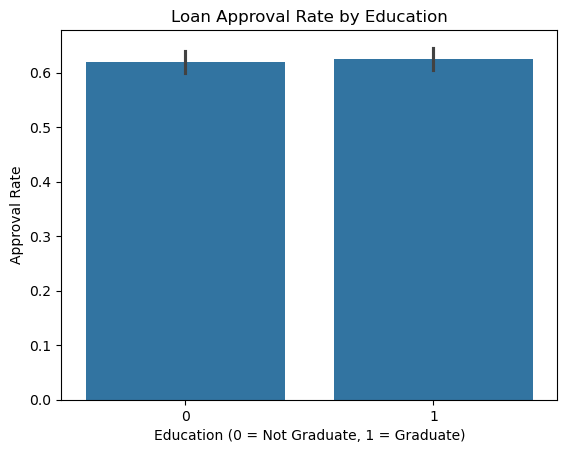

In [62]:
sns.barplot(x='education', y='loan_status', data=df)
plt.title("Loan Approval Rate by Education")
plt.xlabel("Education (0 = Not Graduate, 1 = Graduate)")
plt.ylabel("Approval Rate")
plt.show()


Text(0.5, 1.0, 'Loan Approval Count (0 = Rejected, 1 = Approved)')

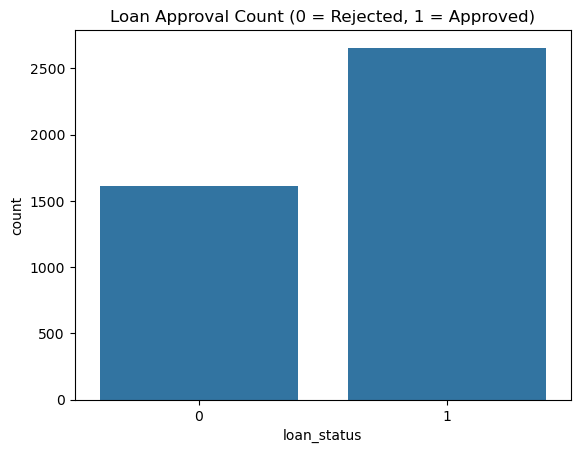

In [63]:
sns.countplot(x='loan_status', data=df)
plt.title("Loan Approval Count (0 = Rejected, 1 = Approved)")


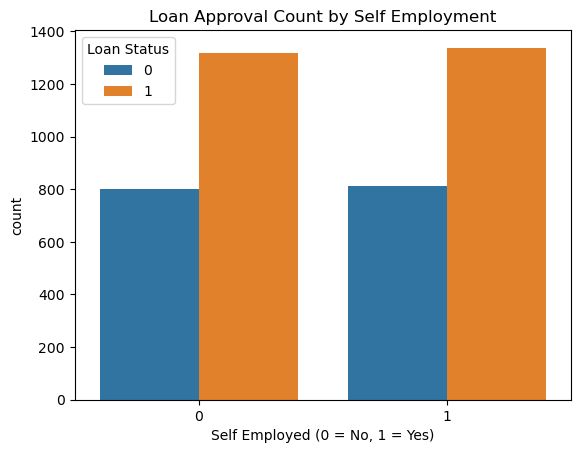

In [64]:
sns.countplot(x='self_employed', hue='loan_status', data=df)
plt.title("Loan Approval Count by Self Employment")
plt.xlabel("Self Employed (0 = No, 1 = Yes)")
plt.legend(title='Loan Status')
plt.show()


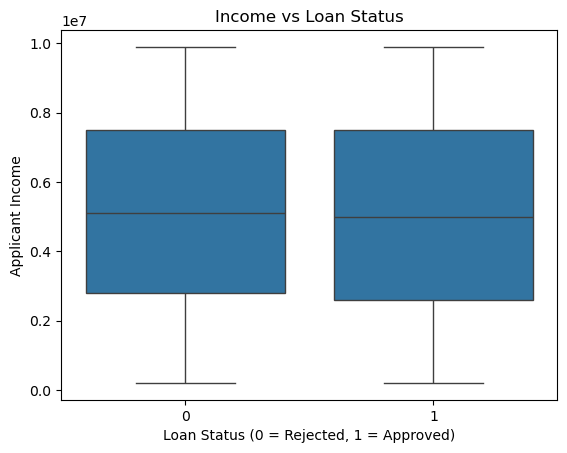

In [65]:
sns.boxplot(x='loan_status', y='income_annum', data=df)
plt.title("Income vs Loan Status")
plt.ylabel("Applicant Income")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.show()


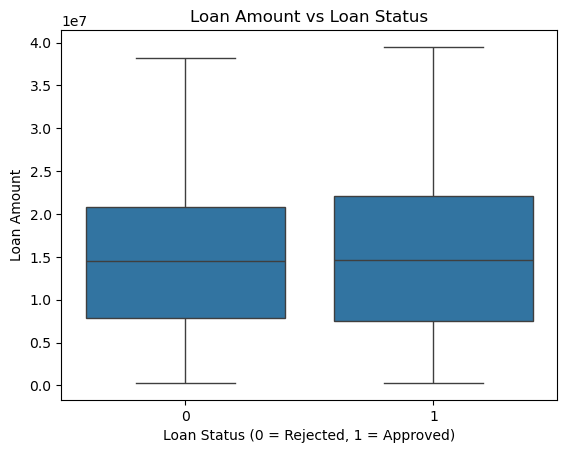

In [66]:
sns.boxplot(x='loan_status', y='loan_amount', data=df)
plt.title("Loan Amount vs Loan Status")
plt.ylabel("Loan Amount")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.show()



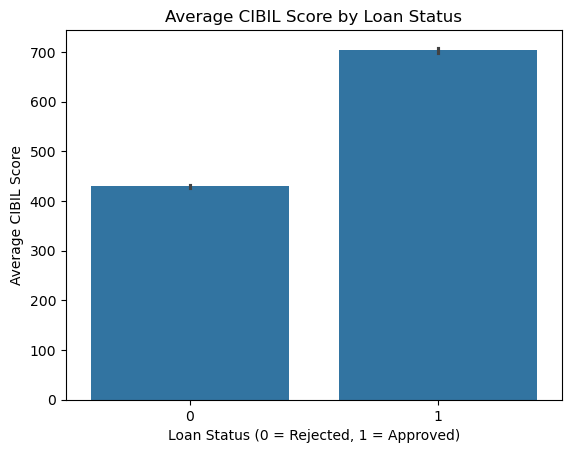

In [67]:
sns.barplot(x='loan_status', y='cibil_score', data=df)
plt.title("Average CIBIL Score by Loan Status")
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Average CIBIL Score")
plt.show()


In [68]:
x= df.drop('loan_status',axis =1)
y=df['loan_status']

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import xgboost as xgb

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size = 0.20,random_state = 42)

In [71]:
scaler  = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [72]:
model = KNeighborsClassifier()
model.fit(x_train_scaled,y_train)


KNeighborsClassifier()

In [73]:
y_pred=model.predict(x_test_scaled)

In [74]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,

In [75]:
accuracy_score(y_test, y_pred)

0.8805620608899297

In [76]:
confusion_matrix(y_test, y_pred)

array([[273,  45],
       [ 57, 479]])

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       318
           1       0.91      0.89      0.90       536

    accuracy                           0.88       854
   macro avg       0.87      0.88      0.87       854
weighted avg       0.88      0.88      0.88       854



In [78]:
model = LogisticRegression()
model.fit(x_train_scaled,y_train)



LogisticRegression()

In [79]:

y_pred=model.predict(x_test_scaled)
y_pred


array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,

In [80]:
accuracy_score(y_test, y_pred)

0.9074941451990632

In [81]:
confusion_matrix(y_test, y_pred)

array([[275,  43],
       [ 36, 500]])

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.92      0.93      0.93       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854



In [83]:
model = RandomForestClassifier()
model.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [84]:
y_pred=model.predict(x_test_scaled)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,

In [85]:
accuracy_score(y_test, y_pred)

0.9800936768149883

In [86]:
confusion_matrix(y_test, y_pred)

array([[307,  11],
       [  6, 530]])

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [88]:

joblib.dump(model, "random_forest_model.pkl")  


['random_forest_model.pkl']

In [89]:
model = xgb.XGBClassifier()  
model.fit(x_train_scaled, y_train)  


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [90]:
y_pred=model.predict(x_test_scaled)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,

In [91]:
accuracy_score(y_test, y_pred)

0.9789227166276346

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [93]:
confusion_matrix(y_test, y_pred)



array([[307,  11],
       [  7, 529]])

## this is code genrated by ai for deplyoment 

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib

# =========================
# Load Dataset
# =========================
df = pd.read_csv("loan_approval_dataset.csv")

# Fix column names
df.columns = df.columns.str.lower().str.strip()

# Fix spaces inside text values
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# =========================
# Encode categorical columns
# =========================
df["education"] = df["education"].map({
    "Graduate": 1,
    "Not Graduate": 0
})

df["self_employed"] = df["self_employed"].map({
    "Yes": 1,
    "No": 0
})

df["loan_status"] = df["loan_status"].map({
    "Approved": 1,
    "Rejected": 0
})

# Remove any rows with missing encoded values
df.dropna(inplace=True)

# =========================
# Feature Selection
# =========================
features = [
    "no_of_dependents","education","self_employed","income_annum",
    "loan_amount","loan_term","cibil_score",
    "residential_assets_value","commercial_assets_value",
    "luxury_assets_value","bank_asset_value"
]

X = df[features]
y = df["loan_status"]

print("✅ Dataset loaded:", X.shape[0], "rows")

# =========================
# Train-Test Split
# =========================
test_size = 0.2
if len(df) < 10: test_size = 0.1
if len(df) < 5: test_size = 0.0

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42
)

print("Train size:", len(X_train), " | Test size:", len(X_test))

# =========================
# Full Pipeline (Scaling + Model)
# =========================
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(n_estimators=200, random_state=42))
])

pipeline.fit(X_train, y_train)

# =========================
# Save Final Model
# =========================
joblib.dump(pipeline, "loan_pipeline.joblib")

print("🎯 Final Pipeline Saved Successfully → loan_pipeline.joblib")


✅ Dataset loaded: 4269 rows
Train size: 3415  | Test size: 854
🎯 Final Pipeline Saved Successfully → loan_pipeline.joblib
